In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data =  pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print(data.shape)
data['Species'].unique()

(150, 6)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
x = data.iloc[:,1:5]
y = data.iloc[:,5:]

In [8]:
encode = LabelEncoder()
y = encode.fit_transform(y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [10]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
pred = naive_bayes.predict(x_test)

In [11]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [12]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [13]:
matrix =  confusion_matrix(y_test,pred,labels = naive_bayes.classes_)
print(matrix)



[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


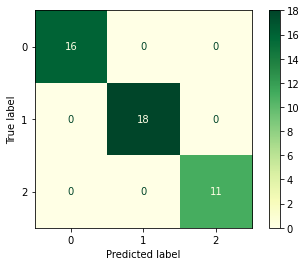

In [14]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=naive_bayes.classes_)
conf_matrix.plot(cmap=plt.cm.YlGn)
plt.show()

In [15]:
tp1 = matrix[0][0]
fp1 = matrix[0][1]+matrix[0][2]
tn1 = matrix[1][1]+matrix[1][2]+matrix[2][1]+matrix[2][2]
fn1 = matrix[1][0]+matrix[2][0]
print("For class 1 :")
print("TP = ",tp1)
print("FP = ",fp1)
print("TN = ",tn1)
print("FN = ",fn1)

For class 1 :
TP =  16
FP =  0
TN =  29
FN =  0


In [16]:
print("For class 1 :")
acc = (tp1+tn1)/(tp1+fp1+tn1+fn1)
err_rate = 1-acc
prec = tp1/(tp1+fp1)
recall = tp1/(tp1+fn1)
print ("Accuracy : ", acc)
print("Error rate : ", err_rate)
print("Precision : ", prec)
print("Recall :", recall)

For class 1 :
Accuracy :  1.0
Error rate :  0.0
Precision :  1.0
Recall : 1.0


In [17]:
tp2 = matrix[1][1]
fp2 = matrix[1][0]+matrix[1][2]
tn2 = matrix[0][0]+matrix[0][2]+matrix[2][0]+matrix[2][2]
fn2 = matrix[0][1]+matrix[2][1]
print("For class 2 :")
print("TP = ",tp2)
print("FP = ",fp2)
print("TN = ",tn2)
print("FN = ",fn2)

For class 2 :
TP =  18
FP =  0
TN =  27
FN =  0


In [19]:
print("For class 2 :")
acc2 = (tp2+tn2)/(tp2+fp2+tn2+fn2)
err_rate2 = 1-acc2
prec2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
print ("Accuracy : ", acc2)
print("Error rate : ", err_rate2)
print("Precision : ", prec2)
print("Recall :", recall2)

For class 2 :
Accuracy :  1.0
Error rate :  0.0
Precision :  1.0
Recall : 1.0


In [20]:
tp3 = matrix[2][2]
fp3 = matrix[2][0]+matrix[2][1]
tn3 = matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]
fn3 = matrix[0][2]+matrix[1][2]
print("For class 3 :")
print("TP = ",tp3)
print("FP = ",fp3)
print("TN = ",tn3)
print("FN = ",fn3)

For class 3 :
TP =  11
FP =  0
TN =  34
FN =  0


In [21]:
print("For class 3 :")
acc3 = (tp3+tn3)/(tp3+fp3+tn3+fn3)
err_rate3 = 1-acc3
prec3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
print ("Accuracy : ", acc3)
print("Error rate : ", err_rate3)
print("Precision : ", prec3)
print("Recall :", recall3)

For class 3 :
Accuracy :  1.0
Error rate :  0.0
Precision :  1.0
Recall : 1.0
